# BoxWorld Results

In [1]:
colab = False

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from RelationalModule import ActorCritic
from RelationalModule import train_agent as train
from RelationalModule import utils
from importlib import reload

## Control agent results vs random

**Results for unboxed gem**

In [3]:
load_dir = "Results/BoxWorld/"
queries = ['control', '5000-episodes']
train_dict = utils.load_session(load_dir, queries)

Number of matching filenames: 1
 ['S_control_unboxed_gem_5000-episodes_WNTN.npy']


In [4]:
game_params = train_dict['game_params']
HPs = train_dict['HPs']
score = train_dict['score']
keywords = train_dict['keywords']
ID = keywords[-1]

In [5]:
rnd_mean_score = np.load("Results/BoxWorld/Simplified/mean_score_rnd_agent_unboxed_gem.npy").item()

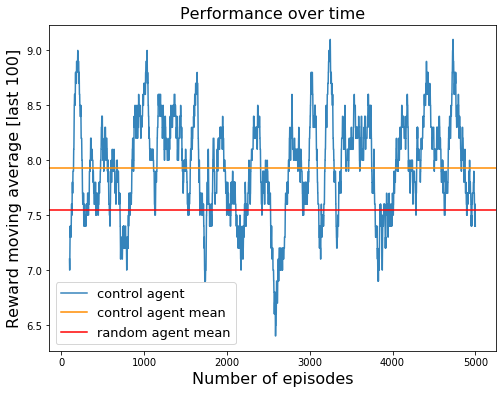

In [6]:
plt.figure(figsize=(8,6))
n_epochs = np.arange(100, len(score))
average_score = np.array([np.mean(score[i:i+100]) for i in range(len(score)-100)])
plt.plot(n_epochs, average_score, alpha=0.9, label='control agent')
plt.axhline(score.mean(), c='darkorange', label = 'control agent mean')
plt.axhline(rnd_mean_score, c='r', label = 'random agent mean')
plt.title("Performance over time", fontsize=16)
plt.xlabel("Number of episodes", fontsize=16)
plt.ylabel("Reward moving average [last 100]", fontsize=16)
plt.legend(fontsize=13)
plt.show()

## Episode rendering


In [16]:
# Load agent 
if colab:
    agent = torch.load(load_dir+"agent_"+ID)
else:
    agent = torch.load(load_dir+"agent_"+ID, map_location=torch.device('cpu'))
    agent.device = 'cpu'

In [19]:
reload(utils)

<module 'RelationalModule.utils' from '/home/nicola/Nicola_unipd/MasterThesis/RelationalDeepRL/RelationalModule/utils.py'>

<IPython.core.display.Javascript object>


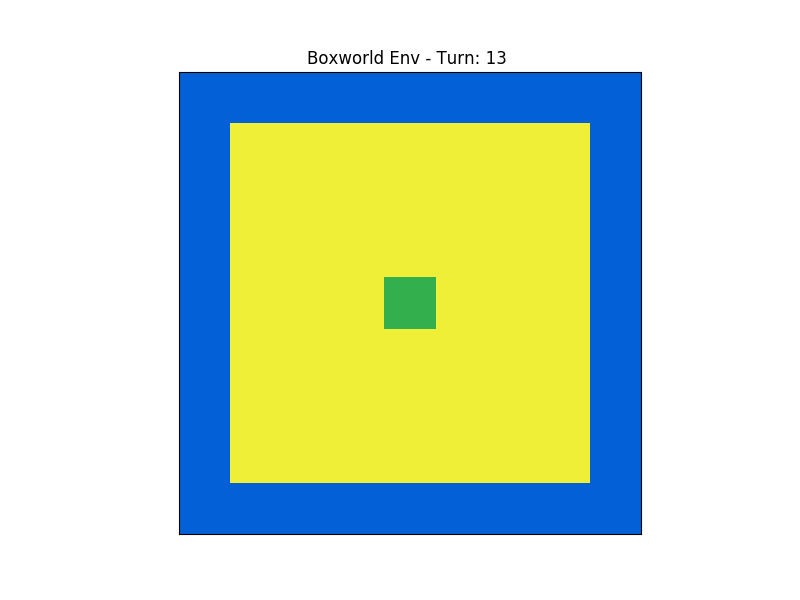

In [20]:
%matplotlib notebook
utils.rendering(agent, game_params, save=False)

## Old plots

In [ ]:
def print_params(params):
    for p in params.keys():
        print(p, params[p])

In [ ]:
# Load data
save_dir = 'Results/BoxWorld/Simplified/'
agent = torch.load(save_dir+"trained_agent2", map_location=torch.device('cpu'))
game_params = np.load(save_dir+"game_params2.npy", allow_pickle=True).item()
HPs = np.load(save_dir+"HP2.npy", allow_pickle=True).item()
score1 = np.load(save_dir+"performance1.npy")
score2 = np.load(save_dir+"performance2.npy")
score = np.concatenate((score1,score2))

In [ ]:
print_params(HPs)

In [ ]:
print_params(game_params)

In [ ]:
def plot_score(score):
    plt.figure(figsize=(8,6))
    n_epochs = np.arange(100, len(score))
    average_score = np.array([np.mean(score[i:i+100]) for i in range(len(score)-100)])
    plt.plot(n_epochs, average_score, alpha=0.9)
    plt.title("Performance over time", fontsize=16)
    plt.xlabel("Number of episodes", fontsize=16)
    plt.ylabel("Reward moving average [last 100]", fontsize=16)
    plt.show()

In [ ]:
plot_score(score)